In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_columns",None)
pd.set_option("display.min_rows",None)
import warnings
warnings.filterwarnings('ignore')

In [88]:
df=pd.read_csv("titanic-training-data.csv")

In [89]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [91]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [92]:
median1=df["Age"].median()

In [93]:
median1

28.0

In [94]:
df["Age"]=df["Age"].replace(np.nan,median1)

In [95]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [96]:
mode1=df["Embarked"].mode().values[0]
mode1

'S'

In [97]:
df["Embarked"]=df["Embarked"].replace(np.nan,mode1)

In [98]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [99]:
df=df.drop("Cabin",axis=1)

In [100]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [101]:
duplicate=df.duplicated()
print(duplicate.sum())

0


<Axes: xlabel='Age'>

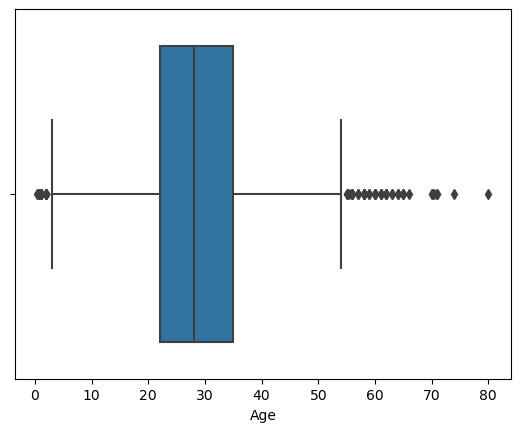

In [102]:
sns.boxplot(x="Age",data=df)

In [103]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range






In [104]:
lowAge,uppAge=remove_outlier(df["Age"])
df['Age']=np.where(df['Age']>uppAge,uppAge,df['Age'])
df['Age']=np.where(df['Age']<lowAge,lowAge,df['Age'])

<Axes: xlabel='Age'>

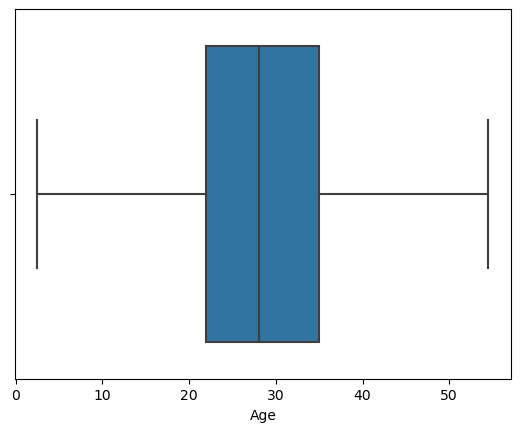

In [105]:
sns.boxplot(x="Age",data=df)

### drop insignificant columns

In [115]:
df.isnull().sum()

Sex_False         0
Sex_True          0
Embarked_False    0
Embarked_True     0
dtype: int64

### encoding

In [107]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [108]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [109]:
df=pd.get_dummies(["Sex","Embarked"])

In [110]:
df.head()

,Embarked,Sex
0,False,True
1,True,False


In [111]:
df=pd.get_dummies(df,columns=["Sex","Embarked"])

In [112]:
df.head()

,Sex_False,Sex_True,Embarked_False,Embarked_True
0,False,True,True,False
1,True,False,False,True


### dataset2(pima diabetes dataset)

In [ ]:
df=pd.read_csv("pima-indians-diabetes-2.csv")

In [113]:
df.head()

,Sex_False,Sex_True,Embarked_False,Embarked_True
0,False,True,True,False
1,True,False,False,True


In [114]:
df.dtypes

Sex_False         bool
Sex_True          bool
Embarked_False    bool
Embarked_True     bool
dtype: object